In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Datset

In [2]:
train=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\ML Challenge\\challenge 1\\final.csv')
train.head(2)

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
1,57,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1


# Exploratory Data Analysis on train data

In [3]:
train.shape

(253, 15)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        253 non-null    int64  
 1   age       253 non-null    int64  
 2   sex       253 non-null    int64  
 3   cp        253 non-null    int64  
 4   trestbps  253 non-null    int64  
 5   chol      253 non-null    int64  
 6   fbs       253 non-null    int64  
 7   restecg   253 non-null    int64  
 8   thalach   253 non-null    int64  
 9   exang     253 non-null    int64  
 10  oldpeak   253 non-null    float64
 11  slope     253 non-null    int64  
 12  ca        253 non-null    int64  
 13  thal      253 non-null    int64  
 14  target    253 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 29.8 KB


In [5]:
train.describe()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,153.339921,53.976285,0.683794,0.980237,131.822134,245.051383,0.138340,0.509881,150.260870,0.332016,1.037945,1.399209,0.691700,2.312253,0.541502
std,88.442134,9.156890,0.465916,1.032990,17.288518,52.583053,0.345941,0.524122,22.538924,0.471870,1.163799,0.612955,1.011742,0.618280,0.499262
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,152.000000,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,0.000000,154.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,230.000000,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,303.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Check 1- NaN  values on train data

In [8]:
train.isnull().any()

ID          False
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [9]:
df=train.copy()

In [10]:
df.shape

(253, 15)

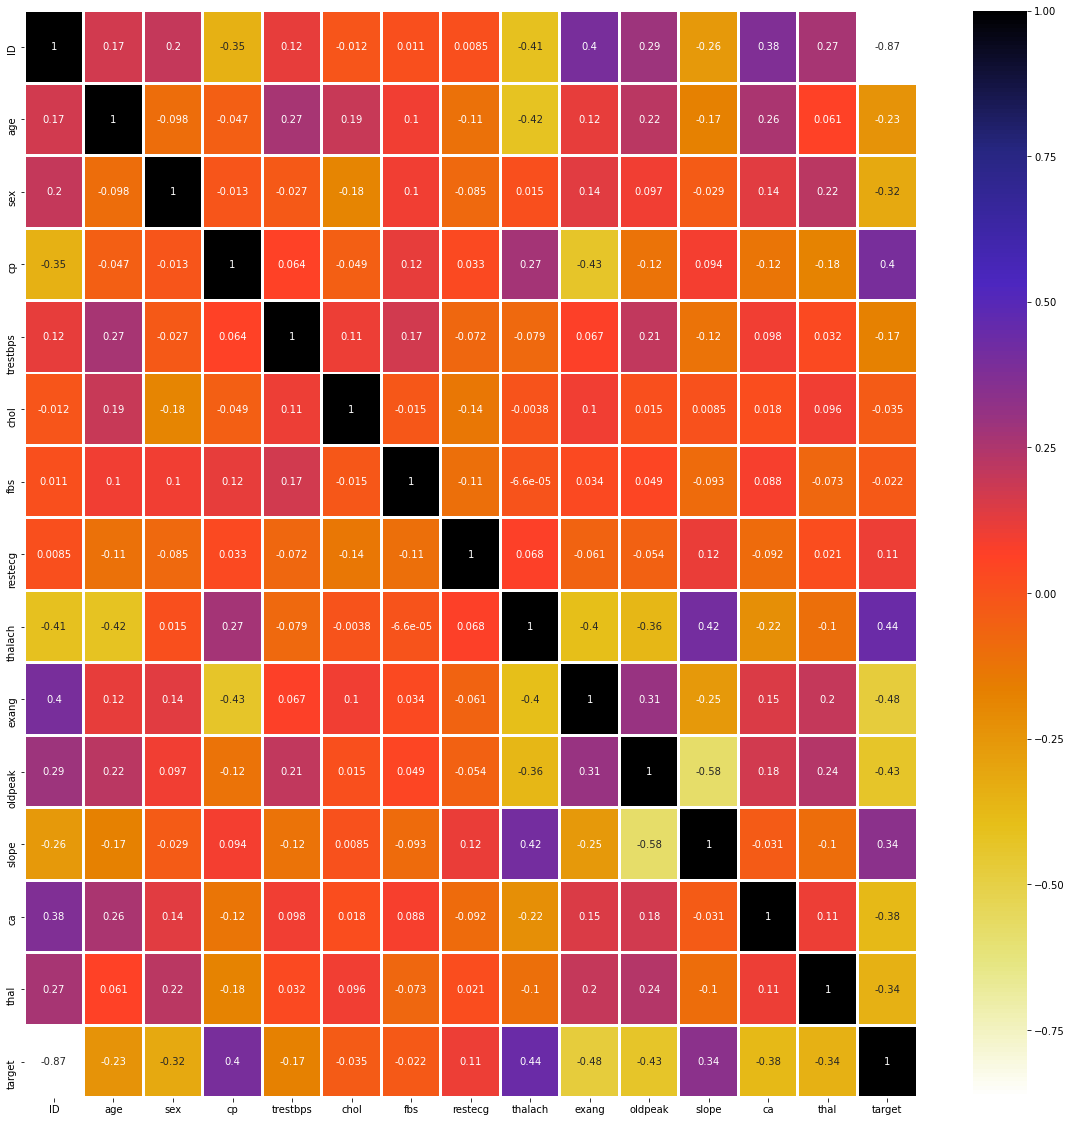

In [12]:
#Pearson Corellation

correlate = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r,linewidths=2)


#Dropping 2 features as they do not have equal categorical features on train and test data

In [13]:
df=df.drop(['ID','ca','thal'],axis=1)

In [14]:
df.shape

(253, 12)

# Check 2 - Balance Dataset or Not

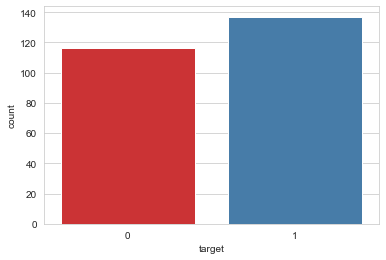

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='Set1')

# Feature Engineering 1 (Categorical Handling)

In [16]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope'])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2
0,65,140,417,157,0.8,1,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1
1,48,122,222,186,0.0,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
2,52,172,199,162,0.5,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,44,118,242,149,0.3,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
4,57,130,236,174,0.0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


# Feature Engineering 2 (Scaling)

In [17]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2
0,1.206257,0.473961,3.276520,0.299592,-0.204860,1,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1
1,-0.653948,-0.569257,-0.439249,1.588806,-0.893627,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
2,-0.216253,2.328569,-0.877520,0.521870,-0.463148,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,-1.091643,-0.801083,-0.058145,-0.056053,-0.635340,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
4,0.330867,-0.105605,-0.172476,1.055338,-0.893627,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


# Building Model

Since it seems a classifier problem, we shall use 3 algorithms

1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Feature-Target split

In [19]:
X = dataset.drop(['target'], axis = 1)
y = dataset['target']

In [20]:
X.shape, y.shape

((253, 21), (253,))

# Using CrossValscore to comapre Algorithms

# KNeighborsClassifier

In [23]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

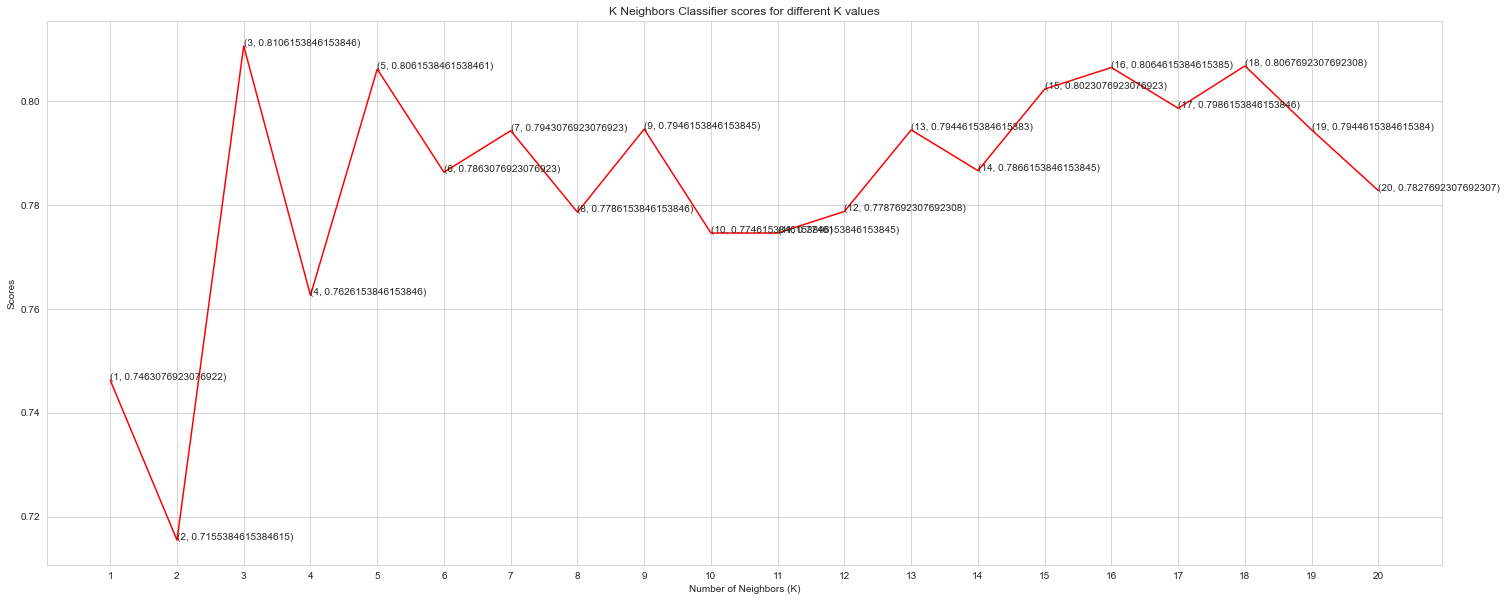

In [25]:
plt.figure(figsize=(25,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')

for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

HIGHEST SCORE RATE IS AT K =3

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8106153846153846

# Random Forest Classifier

In [27]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.7863076923076923

# Decision Tree

In [28]:
d_scores = cross_val_score(DecisionTreeClassifier(), X,y)
d_scores.mean()

0.7355294117647058

We can see KNN is more suitable among all 3

# Train -Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,df['target'],
                                                    test_size=0.25)

Building a KNN model to predict whether patient is in  1 or 0 in target. 

In [30]:
#We'll start with k=1.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
pred = knn.predict(X_test)

# Predictions and Evaluations
Evaluating aforementioned KNN model!

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[24  2]
 [ 5 33]]


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        26
           1       0.94      0.87      0.90        38

    accuracy                           0.89        64
   macro avg       0.89      0.90      0.89        64
weighted avg       0.90      0.89      0.89        64



# Elbow Method to get K Value¶

In [73]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

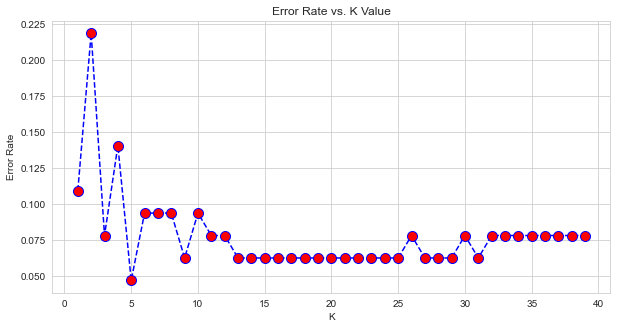

In [74]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

After K>10 the error rate is roughly between  0.05-0.075

Let's retrain the model with that and check the classification report!

In [48]:
#K=11
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Confusion Matrix WITH K=11')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Confusion Matrix WITH K=11
[[24  2]
 [ 3 35]]


              precision    recall  f1-score   support

           0       0.89      0.92      0.91        26
           1       0.95      0.92      0.93        38

    accuracy                           0.92        64
   macro avg       0.92      0.92      0.92        64
weighted avg       0.92      0.92      0.92        64



# Importing Test Data

In [49]:
test=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\ML Challenge\\challenge 1\\test.csv')
test.head(2)

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,128,67,0,2,152,277,0,1,172,0,0.0,2,1,2
1,232,57,1,0,165,289,1,0,124,0,1.0,1,3,3


In [50]:
test.shape

(50, 14)

In [51]:
df1=test.copy()
df1.shape

(50, 14)

In [52]:
df1=df1.drop(['ID','ca','thal'],axis=1)

In [53]:
df.shape,df1.shape

((253, 12), (50, 11))

# Transforming test data

In [54]:
dataset1 = pd.get_dummies(df1, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope'])
dataset1.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2
0,67,152,277,172,0.0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
1,57,165,289,124,1.0,0,1,1,0,0,...,0,1,1,0,0,1,0,0,1,0
2,48,130,256,150,0.0,0,1,1,0,0,...,0,1,1,0,0,0,1,0,0,1
3,58,112,230,165,2.5,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
4,40,140,199,178,1.4,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


# Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset1[columns_to_scale] = standardScaler.fit_transform(dataset1[columns_to_scale])

dataset1.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2
0,1.272278,1.160541,0.514774,1.040383,-0.885585,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
1,0.083233,1.856437,0.767321,-0.922604,-0.020756,0,1,1,0,0,...,0,1,1,0,0,1,0,0,1,0
2,-0.986907,-0.017130,0.072818,0.140681,-0.885585,0,1,1,0,0,...,0,1,1,0,0,0,1,0,0,1
3,0.202138,-0.980679,-0.474367,0.754114,1.276488,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
4,-1.938143,0.518175,-1.126779,1.285756,0.325176,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [56]:
dataset.shape,dataset1.shape

((253, 22), (50, 21))

# Using KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=21)

# Prediction and Exporting CSV :Test Data

In [76]:
pred = knn.predict(dataset1)

In [77]:
pred_df=pd.DataFrame(pred)
pred_df.head()

,0
0,1
1,0
2,1
3,1
4,1


In [78]:
#COncatenating ID + Prediction
output=pd.concat([test['ID'],pred_df],axis=1)

In [79]:
#Renaming Columns
output.columns=['ID','target']
#Reseting Index
output=output.set_index('ID')
output.head()


,target
ID,
128,1
232,0
220,1
184,1
25,1


# Exporting to CSV

In [80]:
output_file=pd.DataFrame(output).to_csv("C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\ML Challenge\\challenge 1\\heart_prediction.csv")